# 5.1. 1차원 입력 직선모델

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성 --------------------
# X : 나이, T : 키
np.random.seed(seed = 1)
X_min = 4
X_max = 30
X_n   = 16
X     = 5 + 25 * np.random.rand(X_n)

Prm_c = [170, 108, 0.2] # 생성 매개 변수
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) + 4 * np.random.randn(X_n) # (A)

np.savez('ch5_data.npz', X = X, X_min = X_min, X_max = X_max, X_n = X_n, T = T)


In [2]:
print("X")
print(np.round(X, 2))
print("T")
print(np.round(T, 2))

X
[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
T
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


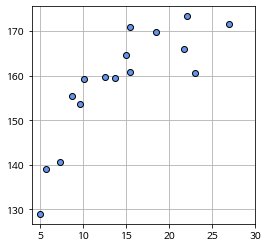

In [3]:
# 데이터 그래프 -----------------------------
plt.figure(figsize = (4, 4))

plt.plot(X, T, marker = 'o', linestyle = "None",
        markeredgecolor = "black", color = "cornflowerblue")
plt.xlim(X_min, X_max)
plt.grid(True)

plt.show()

## 5.1.1. 직선 모델

$ y(x) = w_0*x + w_1$

## 5.1.2. 제곱 오차 함수

* 오차 J를 정의
$ J = 1/N * \sum \limits _{n=1} ^{N - 1} (y_n - t_n)^2 $

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


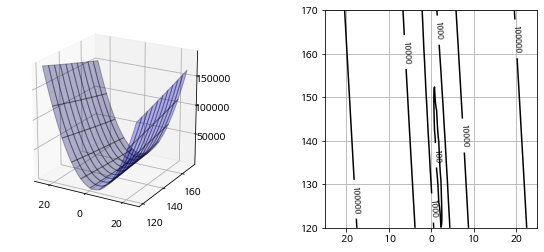

In [4]:
from mpl_toolkits.mplot3d import Axes3D

# 평균 오차 함수 ----------------------------
def mse_line(x, t, w):
    y = w[0] * x + w[1]
    mse = np.mean((y -t) ** 2)
    
    return mse

# 계산 ---------------------------------------
xn = 100 # 등고선 표시 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)

xx0, xx1 = np.meshgrid(x0, x1)

J = np.zeros((len(x0), len(x1)))

for i0 in range(xn):
    for i1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

# 표시 ----------------------------------------
plt.figure(figsize = (9.5, 4))
plt.subplots_adjust(wspace = 0.5)

ax = plt.subplot(1, 2, 1, projection = "3d")
ax.plot_surface(xx0, xx1, J, 
               rstride = 10,
               cstride = 10,
               alpha   = 0.3,
               color   = 'blue',
               edgecolor = 'black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, J, 30, 
                  colors = 'black',
                  levels = [100, 1000, 10000, 100000])
cont.clabel(fmt = '%1.0f', fontsize = 8)
plt.grid(True)

plt.show()
    

## 5.1.3. 매개 변수 구하기(경사하강법)

In [5]:
# 평균 제곱 오차의 기울기 ----------------------
def dmse_line(x, t, w):
    y = w[0] * x + w[1]
    d_w0 = 2 * np.mean((y - t) * x)
    d_w1 = 2 * np.mean(y - t)
    
    return d_w0, d_w1

d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))

[5046.3  301.8]


반복 횟수: 13820
W = [1.539947, 136.176160]
dMSE = [-0.005794, 0.099991]
MSE = 49.027452


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


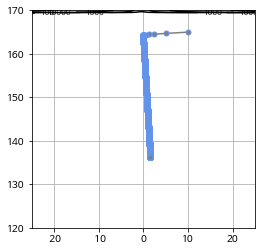

In [6]:
# 경사 하강법 -----------------------------------
def fit_line_num(x, t):
    w_init = [10.0, 165.0] # 초기 매개변수
    alpha = 0.001          # 확습률
    i_max = 100000         # 반복수
    eps   = 0.1            # 반복을 종료 기울기의 절대값의 한계
    w_i   = np.zeros([i_max, 2])
    w_i[0, :] = w_init
    
    for i in range(1, i_max):
        dmse = dmse_line(x, t, w_i[i - 1])
        w_i[i, 0] = w_i[i - 1, 0] - alpha * dmse[0]
        w_i[i, 1] = w_i[i - 1, 1] - alpha * dmse[1]
        
        if max(np.absolute(dmse)) < eps:
            break
            
    w0 = w_i[i, 0]
    w1 = w_i[i, 1]
    w_i = w_i[:i, :]
    
    return w0, w1, dmse, w_i

# 메인 ----------------------------------------------
plt.figure(figsize = (4, 4)) # WSE의 등고선 표시
xn = 100 # 등고선 해상도
w0_range = [-25, 25]
w1_range = [120, 170]
x0       = np.linspace(w0_range[0], w0_range[1], xn)
x1       = np.linspace(w1_range[0], w1_range[1], xn)

xx0, xx1 = np.meshgrid(x0, x1)

J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
    for j1 in range(xn):
        J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

cont = plt.contour(xx0, xx1, J, 30,
                  colors = 'black',
                  levels = (100, 1000, 10000, 100000))
cont.clabel(fmt = '%1.0f',
           fontsize = 8)
plt.grid(True)

# 경사 하강법 호출 -----------------------------------
W0, W1, dMSE, W_history = fit_line_num(X, T)

# 결과보기 -------------------------------------------
print('반복 횟수: {0}' .format(W_history.shape[0]))
print('W = [{0:.6f}, {1:.6f}]' .format(W0, W1))
print('dMSE = [{0:.6f}, {1:.6f}]' .format(dMSE[0], dMSE[1]))
print('MSE = {0:.6f}' .format(mse_line(X, T, [W0, W1])))

plt.plot(W_history[:, 0], W_history[:, 1], '.-',
        color = "gray", markersize = 10, markeredgecolor = "cornflowerblue")
plt.show()

In [7]:
print(W_history)

[[ 10.         165.        ]
 [  4.95371356 164.69820279]
 [  2.4301957  164.54258086]
 ...
 [  1.53992997 136.1764604 ]
 [  1.53993577 136.17636034]
 [  1.53994156 136.17626032]]


W0 = 1.540, W1 = 136.176
SD = 7.002cm


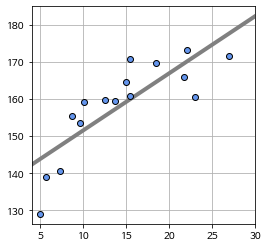

In [8]:
# 선표시 ------------------------------------
def show_line(w):
    xb = np.linspace(X_min, X_max, 100)
    y  = w[0] * xb + w[1]
    
    plt.plot(xb, y, color = (0.5, 0.5, 0.5), linewidth = 4)

# 메인 --------------------------------------
plt.figure(figsize = (4, 4))
W = np.array([W0, W1])
mse = mse_line(X, T, W)

print('W0 = {0:.3f}, W1 = {1:.3f}' .format(W0, W1))
print("SD = {0:.3f}cm" .format(np.sqrt(mse)))
show_line(W)
plt.plot(X, T, marker = "o", linestyle = "None",
        color = "cornflowerblue", markeredgecolor = "black")
plt.xlim(X_min, X_max)
plt.grid(True)

plt.show()

## 5.1.4. 선형 모델 매개 변수의 해석해

* 경사 하강법은 반복 계산에 의해 반복해를 구하는 수치 계산법
* 하지만, 선형모델의 경우는 수치적인 해가 아닌 해석해(정확한 수식으로 구할 수 있는 해) 존재

W0 = 1.558, W1 = 135.872
SD = 7.001cm


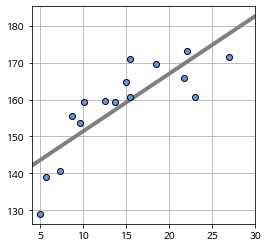

In [9]:
# 해석해 -------------------------------------------
def fit_line(x, t):
    mx = np.mean(x)
    mt = np.mean(t)
    mtx = np.mean(t * x)
    mxx = np.mean(x * x)
    
    w0 = (mtx - mt * mx) / (mxx - mx ** 2)
    w1 = mt - w0 * mx
    
    return np.array([w0, w1])

# 메인
W = fit_line(X, T)
print("W0 = {0:.3f}, W1 = {1:.3f}" .format(W[0], W[1]))
mse = mse_line(X, T, W)
print("SD = {0:.3f}cm" .format(np.sqrt(mse)))
plt.figure(figsize = (4, 4))
show_line(W)
plt.plot(X, T, marker = 'o', linestyle = "None",
        color = "cornflowerblue", markeredgecolor = 'black')
plt.xlim(X_min, X_max)
plt.grid(True)

plt.show()

# 5.2. 2차원 입력면 모델

$* 입력이 2차원인 경우, X = (x_0, x_1)$  
$* 가정) 몸무게 = 23 * 키^2 / 100 + 노이즈$



In [10]:
# 2차원 데이터 생성 -------------------------
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed = 1)

X1 = 23 * (T / 100) ** 2 + 2 * np.random.randn(X_n)
X1_min = 40
X1_max = 75

In [11]:
print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


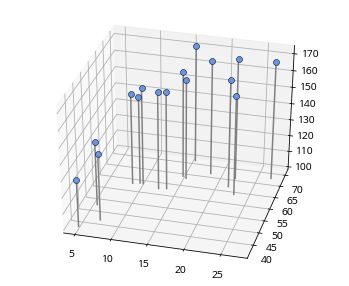

In [12]:
# 2차원 데이터의 표시 --------------------------
def show_data2(ax, x0, x1, t):
    for i in range(len(x0)):
        ax.plot([x0[i], x0[i]], [x1[i], x1[i]],
                [100, t[i]], color = 'gray')
    ax.plot(x0, x1, t, 'o',
               color = 'cornflowerblue', markeredgecolor = 'black',
               markersize = 6, markeredgewidth = 0.5)
    ax.view_init(elev = 35, azim = -75)        
        
# 메인 ------------------------------------------
plt.figure(figsize = (6, 5))
ax = plt.subplot(1, 1, 1, projection = '3d')
show_data2(ax, X0, X1, T)

plt.show()


In [13]:
len(T)

16

## 5.2.2. 면모델

* N개의 2차원 벡터 $x_n$에 대해 각각 $t_n$이 할당되어 있으므로 3차원 그래프를 보는 것이 편함
* 임의의 w에 대해 면을 그리는 함수 show_plane(ax, w) 활용
* 평균 제곱 오차를 계산하는 함수는 mse_plane(x0, x1, t, w)

SD = 6.595cm


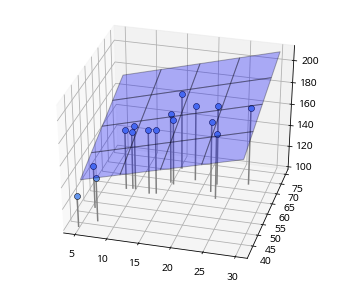

In [14]:
# 면의 표시 -------------------------------------
def show_plane(ax, w):
    px0 = np.linspace(X0_min, X0_max, 5)
    px1 = np.linspace(X1_min, X1_max, 5)
    
    px0, px1 = np.meshgrid(px0, px1)
    
    y = w[0] * px0 + w[1] + px1 + w[2]
    
    ax.plot_surface(px0, px1, y, 
                   rstride = 1,
                   cstride = 1,
                   alpha   = 0.3,
                   color   = 'blue',
                   edgecolor = 'black')
    
# 면의 MSE ----------------------------------------
def mse_plane(x0, x1, t, w):
    y = w[0] + x0 + w[1] * x1 + w[2]
    mse = np.mean((y - t) ** 2)
    
    return mse

# 메인 --------------------------------------------
plt.figure(figsize = (6, 5))
ax = plt.subplot(1, 1, 1, projection = '3d')

W = [1.5, 1, 90]
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)

print("SD = {0:.3f}cm" .format(np.sqrt(mse)))
plt.show()

## 5.2.3. 매개 변수의 해석해

* 데이터에 가장 적합한 W = [$w_0, w_1, w_2$]
* 2차원 면 모델의 경우에도 1차원의 선 모델과 마찬가지로 평균 제곱 오차를 정의할 수 있음
* $J = 1/n \sum \limits _{n = 0} ^{N - 1}(w_0*x_{n, 0} + w_1*x_{n, 1} + w_2 - t_n)^2$
* w를 움직이면 면이 여러 방향을 향하며, 그에 따라 J가 변화함
* 목표는 J가 가장 작아지는 w = [$w_0, w_1, w_2$]를 구하는 것
* J를 최소화하는 최적의 w는 기울기가 0인, 즉 아주 작은 w의 변화에 대해서 J의 변화는 0이기 때문에
J를 $w_0$으로 편미분한 것은 0이며, 또한 J를 $w_1$로 편미분한 것도 0이고, $w_2$로 편미분 한것도 0인 관계 성립

W0 = 0.5, W1 = 1.1, W2 = 89.0
SD = 9.357cm


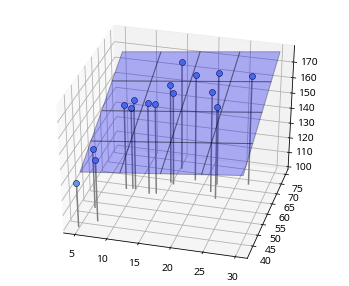

In [15]:
# 해석해 --------------------------------------------
def fit_plane(x0, x1, t):
    c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0)
    c_tx1 = np.mean(t * x1) - np.mean(t) * np.mean(x1)
    c_x0x1 = np.mean(x0 * x1) - np.mean(x0) * np.mean(x1)
    
    v_x0 = np.var(x0)
    v_x1 = np.var(x1)
    
    w0 = (c_tx1 * c_x0x1 - v_x1 * c_tx0) / (c_x0x1 ** 2 - v_x0 * v_x1)
    w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1 ** 2 - v_x0 * v_x1)
    w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
    
    return np.array([w0, w1, w2])

# 메인 ----------------------------------------------
plt.figure(figsize = (6, 5))
ax = plt.subplot(1, 1, 1, projection = '3d')

W = fit_plane(X0, X1, T)
print("W0 = {0:.1f}, W1 = {1:.1f}, W2 = {2:.1f}" .format(W[0], W[1], W[2]))

show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD = {0:.3f}cm" .format(np.sqrt(mse)))

plt.show()

# 5.4. 선형 기저 함수 모델

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 로드 -----------------------------
outfile = np.load('ch5_data.npz')

X     = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n   = outfile['X_n']
T     = outfile['T']

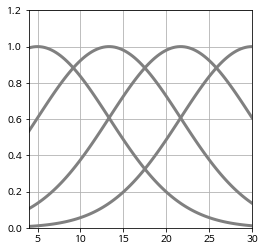

In [17]:
# 가우스 함수 ------------------------------
def gauss(x, mu, s):
    return np.exp(-(x - mu) ** 2 / (2 * s ** 2))

# 메인 -------------------------------------
M = 4
plt.figure(figsize = (4, 4))
mu = np.linspace(5, 30, M)
s = mu[1] - mu[0]
xb = np.linspace(X_min, X_max, 100)

for j in range(M):
    y = gauss(xb, mu[j], s)
    plt.plot(xb, y, color = 'gray', linewidth = 3)
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1.2)

plt.show()



In [18]:
# 선형 기저 함수 모델 -------------------------
def gauss_func(w, x):
    m = len(w) - 1
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    
    y = np.zeros_like(x) # x와 같은 크기로 요소가 0의 행렬 y를 작성
    for j in range(m):
        y = y + w[j] * gauss(x, mu[j], s)
    y = y + w[m]
    
    return y

In [19]:
# 선형 기저 함수 모델 MSE -----------------------
def mse_gauss_func(x, t, w):
    y = gauss_func(w, x)
    mse = np.mean((y - t)**2)
    
    return mse

$ W^* = (X^T*X)^- *X^T*Y$

In [20]:
# 선형 기저 함수 모델 정확한 해 -----------------
def fit_gauss_func(x, t, m):
    mu = np.linspace(5, 30, m)
    s = mu[1] - mu[0]
    n = x.shape[0]
    
    psi = np.ones((n, m+1))
    for j in range(m):
        psi[:, j] = gauss(x, mu[j], s)
    psi_T = np.transpose(psi)
    
    b = np.linalg.inv(psi_T.dot(psi))
    c = b.dot(psi_T)
    w = c.dot(t)
    
    return w

In [21]:
print(X)
print(" ")
print(gauss(X, 5, 2))

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]
 
[1.25734034e-06 2.48436709e-18 9.99998978e-01 7.91948327e-04
 1.85889866e-01 5.13694650e-01 6.65115154e-02 8.88039541e-05
 4.55728510e-06 1.41104366e-10 1.09097289e-06 1.17311335e-16
 3.81709151e-02 6.87831101e-27 9.43083908e-01 5.59620920e-16]


In [38]:
gauss(X, 5, 2).shape

(16,)

W=[29.4 75.7  2.9 98.3 54.9]
SD=3.98 cm


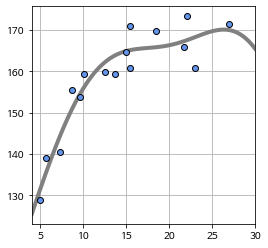

In [22]:
# 가우스 기저 함수 표시 -----------------------
def show_gauss_func(w):
    xb = np.linspace(X_min, X_max, 100)
    y = gauss_func(w, xb)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4) 


# 메인 ----------------------------------
plt.figure(figsize=(4, 4))
M = 4
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W='+ str(np.round(W,1)))
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()


# 5.5. 오버피팅 문제

* 기저함수 M은 어떻게 정의할 것인가?
* M을 충분히 크게 하면 어떤 데이터에도 잘 피팅될까?

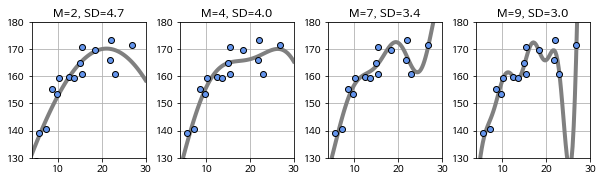

In [23]:
plt.figure(figsize=(10, 2.5))
plt.subplots_adjust(wspace=0.3)

M = [2, 4, 7, 9]

for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    W = fit_gauss_func(X, T, M[i])
    show_gauss_func(W)
    
    plt.plot(X, T, marker='o', linestyle='None',
             color='cornflowerblue', markeredgecolor='black')
    plt.xlim(X_min, X_max)
    plt.grid(True)
    plt.ylim(130, 180)
    
    mse = mse_gauss_func(X, T, W)
    
    plt.title("M={0:d}, SD={1:.1f}".format(M[i], np.sqrt(mse)))

plt.show()
    

* M = 2에서 9까지의 SD를 계산하여 Plotting

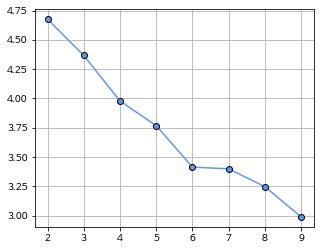

In [24]:
plt.figure(figsize = (5, 4))
M = range(2, 10)

mse2 = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X, T, M[i])
    mse2[i] = np.sqrt(mse_gauss_func(X, T, W))

plt.plot(M, mse2, marker = "o", color = 'cornflowerblue', markeredgecolor = "black")
plt.grid(True)

plt.show()

* 오버피팅 방지를 위해 train / test 구분

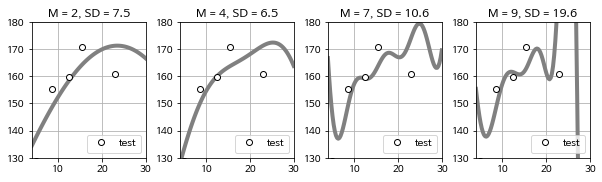

In [35]:
# 훈련 데이터와 테스트 데이터 ---------------------------
X_test = X[:int(X_n / 4 + 1)]
T_test = T[:int(X_n / 4 + 1)]
X_train = X[int(X_n / 4 + 1):]
T_train = T[int(X_n / 4 + 1):]

# 메인 -----------------------------------------------
plt.figure(figsize = (10, 2.5))
plt.subplots_adjust(wspace = 0.3)

M = [2, 4, 7, 9]
for i in range(len(M)):
    plt.subplot(1, len(M), i + 1)
    
    W = fit_gauss_func(X_train, T_train, M[i])
    show_gauss_func(W)
    
    plt.plot(X_test, T_test, marker = 'o',
            linestyle = "None", color = "white",
            markeredgecolor = 'black', label = 'test')
    plt.legend(loc = 'lower right', fontsize = 10, numpoints = 1)
    plt.xlim(X_min, X_max)
    plt.ylim(130, 180)
    plt.grid(True)
    
    mse = mse_gauss_func(X_test, T_test, W)
    
    plt.title("M = {0:d}, SD = {1:.1f}" .format(M[i], np.sqrt(mse)))

plt.show()

* 경향을 정량적으로 보기 위해 M = 2부터 9까지 이동하며 오차(SD)를 Plotting

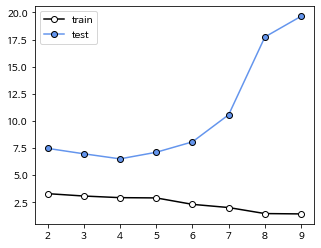

In [37]:
plt.figure(figsize = (5, 4))
M = range(2, 10)

mse_train = np.zeros(len(M))
mse_test  = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i])
    
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i]  = np.sqrt(mse_gauss_func(X_test, T_test, W))

plt.plot(M, mse_train, marker = 'o', linestyle = '-',
        markerfacecolor = 'white', markeredgecolor = 'black',
        color = 'black', label = 'train')
plt.plot(M, mse_test, marker = 'o', linestyle = '-',
        color = 'cornflowerblue', markeredgecolor = 'black',
        label = 'test')
plt.legend(loc = 'upper left', fontsize = 10)

plt.show()



### 교차검증

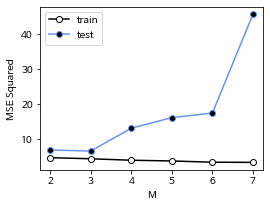

In [49]:
# k겹 교차검증 ----------------------------
def kfold_gauss_func(x, t, m, k):
    n = x.shape[0]
    
    mse_train = np.zeros(k)
    mse_test  = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i]    # np.fmod(n ,k)는 n을 k로 나눈 나머지
        t_train = t[np.fmod(range(n), k) != i]
        x_test  = x[np.fmod(range(n), k) == i]
        t_test  = t[np.fmod(range(n), k) == i]
        
        wm = fit_gauss_func(x_train, t_train, m)
        
        mse_train[i] = mse_gauss_func(x_train, t_train, wm)
        mse_test[i]  = mse_gauss_func(x_test, t_test, wm)
    
    return mse_train, mse_test

# 메인 -----------------------------------
M = range(2, 8)
K = 16

Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test  = np.zeros((K, len(M)))
for i in range(0, len(M)):
    Cv_Gauss_train[:, i], Cv_Gauss_test[:, i] = kfold_gauss_func(X, T, M[i], K)
    
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis = 0))
mean_Gauss_test  = np.sqrt(np.mean(Cv_Gauss_test, axis = 0))

plt.figure(figsize = (4, 3))
plt.plot(M, mean_Gauss_train, marker = 'o', linestyle = "-",
        color = 'k', markerfacecolor = 'w', label = 'train')
plt.plot(M, mean_Gauss_test, marker = 'o', linestyle = "-",
        color = 'cornflowerblue', markerfacecolor = 'black', label = 'test')
plt.legend(loc = 'upper left', fontsize = 10)
plt.ylabel('MSE Squared')
plt.xlabel('M')
plt.show()





* 교차검증결과 M = 3이 최적임을 알 수 있음

SD = 4.37cm


<Figure size 288x288 with 0 Axes>

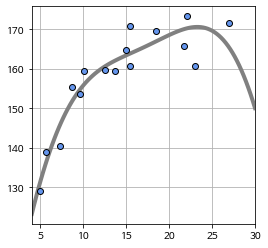

In [55]:
M = 3
plt.figure(figsize = (4, 4))
W = fit_gauss_func(X, T, M)
mse = mse_gauss_func(X, T, W)
print("SD = {0:.2f}cm" .format(np.sqrt(mse)))

plt.figure(figsize = (4, 4))
show_gauss_func(W)
plt.plot(X, T, marker = 'o', linestyle = "None", 
        color = 'cornflowerblue', markeredgecolor = 'black')
plt.xlim([X_min, X_max])
plt.grid(True)



plt.show()


# 5.6. 새로운 모델 생성

* 위 그래프는 25세 이후로 키가 쭉 줄어든다는 모형을 나타내므로 이상함
* 키는 나이가 들어가면서 점차 커지고 일정한 곳에서 수렴한다는 지식을 모델에 추가
* $y(x) = w_0 - w_1 * exp(-w_2x)$
* $w_0, w_1, w_2$는 모두 양의 값을 취하는 매개변수
* x가 증가하면 $exp(-w_2x)$는 0에 접근, 그 결과 1항의 $w_0$만 남게 됨
* 즉, x가 증가하면 y는 $w_0$에 가까워짐

In [63]:
# 모델 A ---------------------------------------
def model_A(x, w):
    y = w[0] - w[1] * np.exp(-w[2] * x)
    
    return y

# 모델 A 표시 ----------------------------------
def show_model_A(w):
    xb = np.linspace(X_min, X_max, 100)
    y = model_A(xb, w)
    
    plt.plot(xb, y, c = [0.5, 0.5, 0.5], lw = 4)

# 모델 A의 MSE
def mse_model_A(w, x, t):
    y = model_A(x, w)
    mse = np.mean((y - t) ** 2)
    
    return mse

# 목적함수 최적화 ------------------------------
from scipy.optimize import minimize

# 모델 A의 매개 변수 최적화 ---------------------
def fit_model_A(w_init, x, t):
    res1 = minimize(mse_model_A, w_init, args = (x, t), method = 'powell')
    
    return res1.x




* scipy.optimize의 minimize는 최적화함수 fit_model_A(w_init, x, t)의 인수에는 반복 연산을 위한 매개변수 초기값 w_init 사용
* 첫 번째 인자는 최소화할 목표 함수
* 두 번째 인수는 w의 초기값
* 세 번째 인수는 목표함수 mse_model_A(w, x, t)를 최적화 하는 매개 변수 w 이외의 인수인 x

W0 = 169.0, W1 = 113.7, W2 = 0.2
SD = 3.86cm


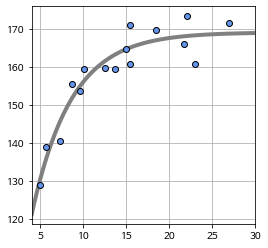

In [65]:
# 메인 ----------------------------------------
plt.figure(figsize = (4, 4))

W_init = [100, 0, 0]
W = fit_model_A(W_init, X, T)
print("W0 = {0:.1f}, W1 = {1:.1f}, W2 = {2:.1f}" .format(W[0], W[1], W[2]))

show_model_A(W)

plt.plot(X, T, marker = "o", linestyle = 'None', 
        color = 'cornflowerblue', markeredgecolor = 'black')
plt.xlim(X_min, X_max)
plt.grid(True)

mse = mse_model_A(W, X, T)
print("SD = {0:.2f}cm" .format(np.sqrt(mse)))

plt.show()

# 5.7. 모델선택

* 홀드 아웃 검증과 교차 검증 모델로 모델의 좋고 나쁨을 평가할 수 있음

Gauss(M = 3) SD = 6.51cm
Model A SD = 4.72cm


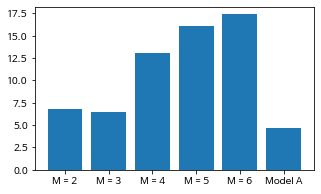

In [69]:
# 교차 검증 model_A ------------------------------------
def kfold_model_A(x, t, k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test  = np.zeros(k)
    
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]
        x_test  = x[np.fmod(range(n), k) == i]
        t_test  = t[np.fmod(range(n), k) == i]
        
        wm = fit_model_A(np.array([169 , 113, 0.2]), x_train, t_train)
        mse_train[i] = mse_model_A(wm, x_train, t_train)
        mse_test[i]  = mse_model_A(wm, x_test, t_test)
        
    return mse_train, mse_test

# 메인 -------------------------------------------------
K = 16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)

mean_A_test = np.sqrt(np.mean(Cv_A_test))
print("Gauss(M = 3) SD = {0:.2f}cm" .format(mean_Gauss_test[1]))
print("Model A SD = {0:.2f}cm" .format(mean_A_test))

SD = np.append(mean_Gauss_test[0:5], mean_A_test)
M = range(6)
label = ["M = 2", "M = 3", "M = 4", "M = 5", "M = 6", "Model A"]

plt.figure(figsize = (5, 3))
plt.bar(M, SD, tick_label = label, align = 'center')
facecolor = 'cornflowerblue'

plt.show()

In [67]:
help(plt.bar)

Help on function bar in module matplotlib.pyplot:

bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
    Make a bar plot.
    
    The bars are positioned at *x* with the given *align*\ment. Their
    dimensions are given by *width* and *height*. The vertical baseline
    is *bottom* (default 0).
    
    Each of *x*, *height*, *width*, and *bottom* may either be a scalar
    applying to all bars, or it may be a sequence of length N providing a
    separate value for each bar.
    
    Parameters
    ----------
    x : sequence of scalars
        The x coordinates of the bars. See also *align* for the
        alignment of the bars to the coordinates.
    
    height : scalar or sequence of scalars
        The height(s) of the bars.
    
    width : scalar or array-like, optional
        The width(s) of the bars (default: 0.8).
    
    bottom : scalar or array-like, optional
        The y coordinate(s) of the bars bases (default: 0).
    
    align : {'cent